In [67]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

#my libraries
import sys
sys.path.append("../code")

import myUtilities

import importlib
importlib.reload(myUtilities)

<module 'myUtilities' from 'd:\\education\\sem 9 SIGMA\\convex optimization\\lab 3\\notebooks\\../code\\myUtilities.py'>

In [68]:
#parameters
image_name = "penguin"
image_path = f"../resources/{image_name}.png"
seed = 42
noise_ratio = 0.5
algo = "DR"
dimension = 256

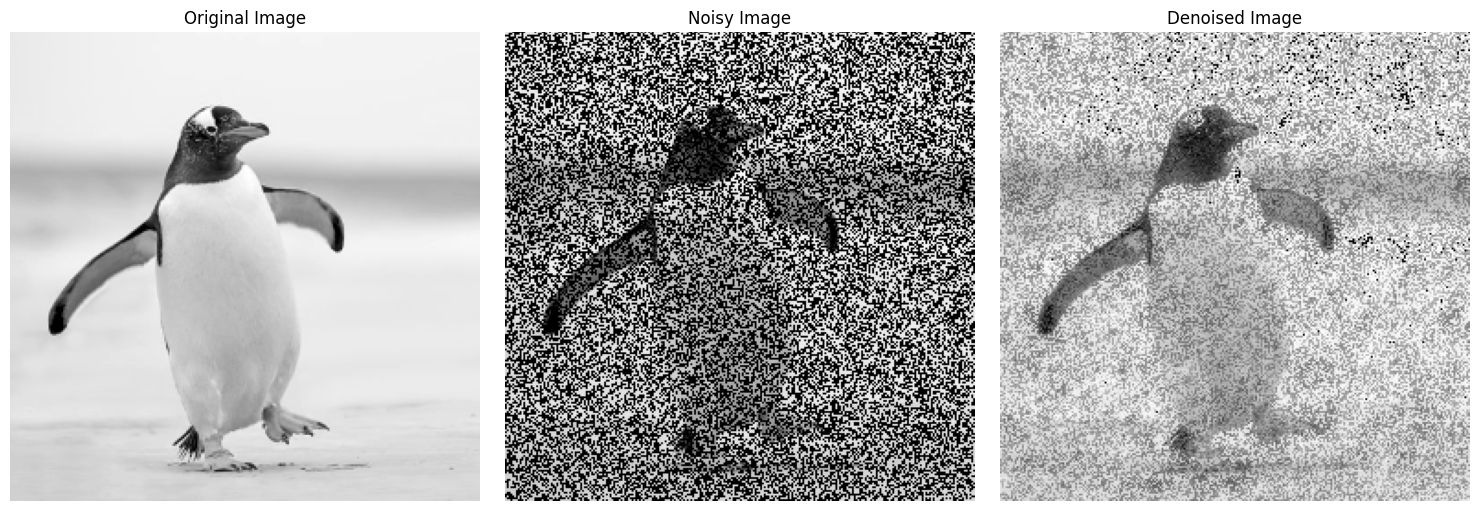

In [69]:
#import the original 
img_OG = cv.resize(cv.imread(image_path,0) , (dimension,dimension))

#add noise
dim = img_OG.shape[0] #image dimension for one axis
noise_indeces = myUtilities.define_noise_mask(dim,noise_ratio,seed = seed)
img_noisy = myUtilities.mask_Image(img_OG,noise_indeces)
img_reconstructed = cv.imread(f"../tests/{image_name}_{dimension}_{noise_ratio}_{algo}.jpeg",0)
#plot original and noisy image
myUtilities.plot_3_images_side_by_side(img_OG,img_noisy,img_reconstructed)

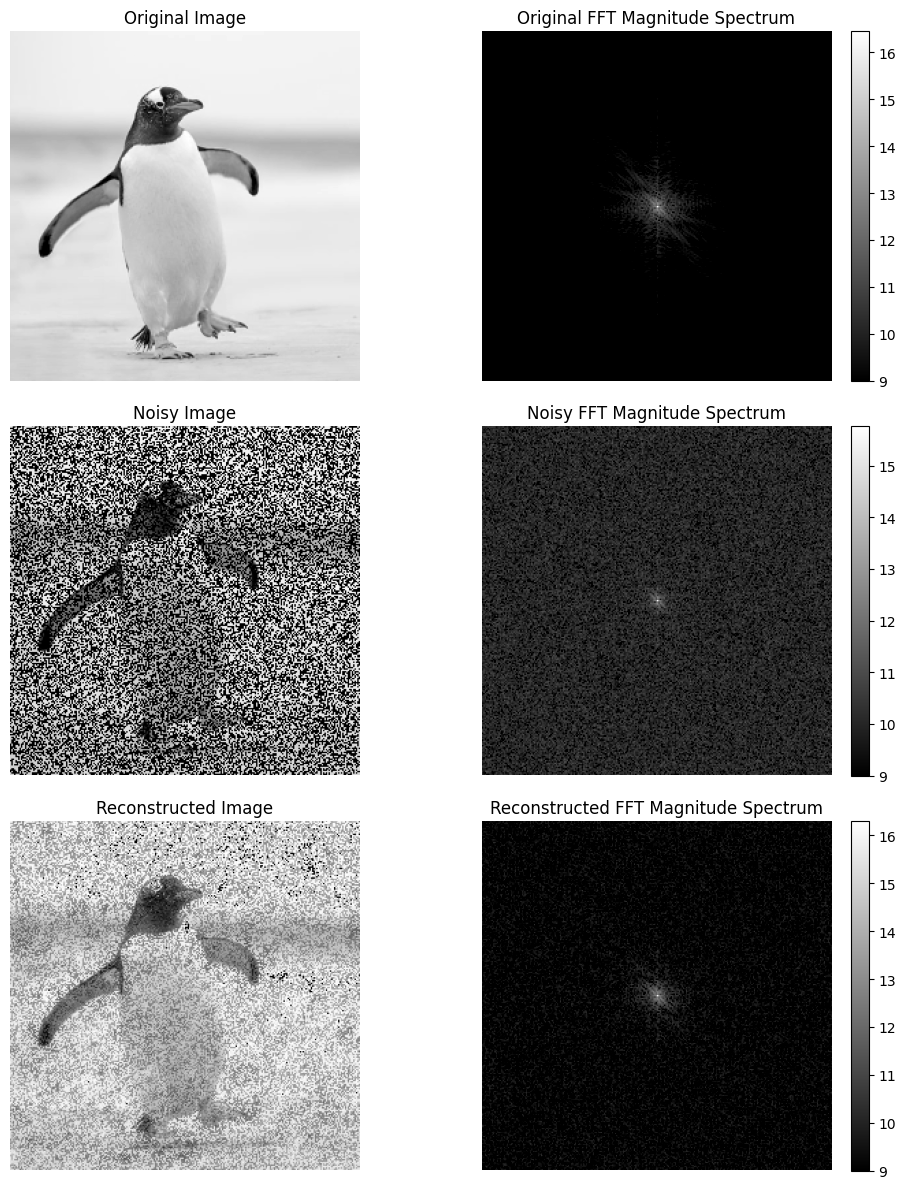

4.579799468337899


In [70]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift

# Load images
original = img_OG
noisy = img_noisy
reconstructed = img_reconstructed


def compute_fft(image):
    fft_result = fft2(image)
    fft_shifted = fftshift(fft_result)
    magnitude_spectrum = np.log(np.abs(fft_shifted) + 1)
    return magnitude_spectrum


# Compute FFTs for each image
fft_original = compute_fft(original)
fft_noisy = compute_fft(noisy)
fft_reconstructed = compute_fft(reconstructed)

# Plot images and their FFTs
fig, axes = plt.subplots(3, 2, figsize=(10, 12))

images = [original, noisy, reconstructed]
ffts = [fft_original, fft_noisy, fft_reconstructed]
titles = ["Original", "Noisy", "Reconstructed"]

for i in range(3):
    axes[i, 0].imshow(images[i], cmap="gray")
    axes[i, 0].set_title(f"{titles[i]} Image")
    axes[i, 0].axis("off")

    im = axes[i, 1].imshow(ffts[i], cmap="gray", vmin=9)
    axes[i, 1].set_title(f"{titles[i]} FFT Magnitude Spectrum")
    axes[i, 1].axis("off")
    fig.colorbar(im, ax=axes[i, 1], orientation='vertical', fraction=0.046, pad=0.04)


plt.tight_layout()
plt.show()

print(np.min(np.abs(fft_reconstructed)))

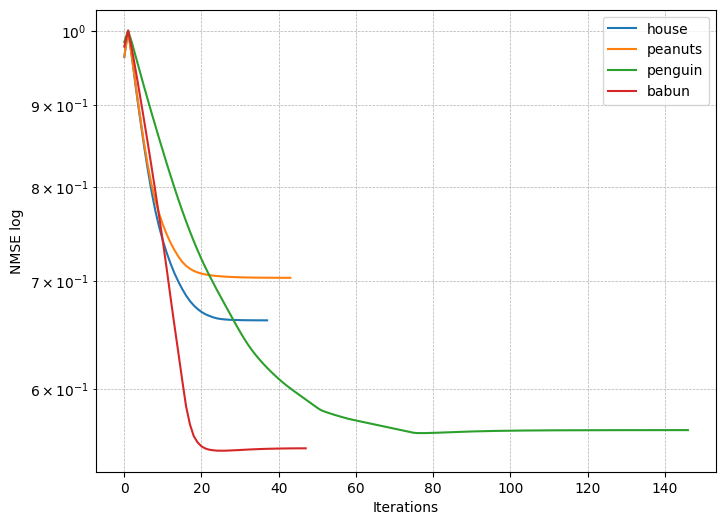

In [72]:
# NMSE_values = np.load(f"../arrays/NMSE_{image_name}_{dimension}_{noise_ratio}_{algo}.npy")
NMSE_values1 = np.load(f"../arrays/NMSE_house_256_0.4_DR.npy")
NMSE_values2 = np.load(f"../arrays/NMSE_peanuts_256_0.4_DR.npy")
NMSE_values3 = np.load(f"../arrays/NMSE_penguin_256_0.5_5_0.5_DR.npy")
NMSE_values4 = np.load(f"../arrays/NMSE_babun_256_0.5_5_0.5_DR.npy")
# Example usage:
myUtilities.plot_nmse_curves(
    [NMSE_values1, NMSE_values2, NMSE_values3, NMSE_values4],
    ["house", "peanuts", "penguin", "babun"],
)

**speed of convergence**

**speed of convergence graph**